# To do the following exercises you need to know how to use:
* pandas dataframes
* dictionaries
* plotting array of images
* convert data to .to_numpy()
* assign inputs (features) to **X_data**
* assign outputs (labels/targets) to **y_data**
* understand the output of attribute .shape (dimensions of the data)
* generate random integers np.random.randint()
* convert color image to grayscale

# Exercise 1
* the file 'mnist_test.csv' contains 10000 images of digits in grayscale saved as a rows in the csv file
* first column contains value of the digits then 784 columns correspond to pixels
* make an array of plots of 25 randomly chosen images (5x5) 
* each plot has to have a title corresponding to a digit 

In [1]:
!ls

dictionaries_and_images.ipynb  mnist_test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set path and read the file
path = "mnist_test.csv"
file = pd.read_csv(path)
df = pd.DataFrame(file)

In [3]:
df.keys()

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [4]:
# Generates 25 random numbers for choosing the images
Imgs_index = np.random.randint(9999, size = 25)
Imgs_numpy = df.to_numpy()

# Splits the title and the image
Imgs_array = Imgs_numpy[Imgs_index,1:]
Imgs_title = Imgs_numpy[Imgs_index,0]

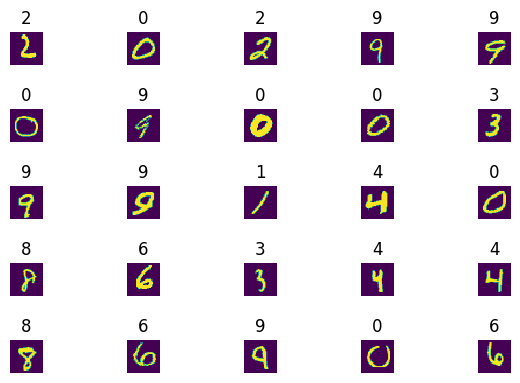

In [5]:
# Creates the new fig and sets size
fig,axs = plt.subplots(5,5)
fig.set_dpi(100)
# Avoids overlaping of titles, images and axes
fig.tight_layout()

i = 0
for index in range(len(Imgs_array)):
    # Reshapes to a square image
    Img = Imgs_array[index].reshape(28,28)
    ax = axs[i//5,i%5]
    ax.set_title(Imgs_title[index])
    ax.imshow(Img)
    ax.set_axis_off()
    i+=1

# Exercise 2

* Sklearn digits dataset (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) contains 1797 images of digits in grayscale 
* download the dataset (command is below) and:
* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title corresponding to a digit 

In [6]:
from sklearn import datasets
digits = datasets.load_digits() # digits is a dictionary

In [7]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
Imgs_index = np.random.randint(1797, size = 25)

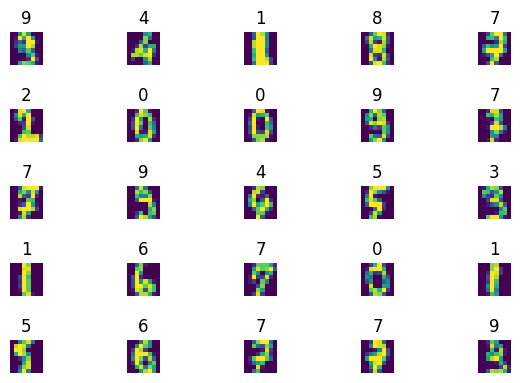

In [10]:
# Creates the new fig and sets size
fig,axs = plt.subplots(5,5)
fig.set_dpi(100)
# Avoids overlaping of titles, images and axes
fig.tight_layout()

i = 0
for index in range(len(Imgs_array)):
    # The index from the set is different from the index for the for statement.
    set_index = Imgs_index[index]
    Img = digits['images'][set_index]
    ax = axs[i//5,i%5]
    ax.set_title(digits['target'][set_index])
    ax.imshow(Img)
    ax.set_axis_off()
    i+=1

# Exercise 3
The CIFAR-10 dataset consists of, in total, 60000 **color** (three channels) images, each with one of 10 labels: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. For an introduction and a download. 

http://www.cs.toronto.edu/~kriz/cifar.html

* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title with a corresponding label



* convert the color images to grayscale by averaging one of the dimensions and again display the images


* make an array of plots of 25 randomly chosen images (5 images x 5 images) 
* each plot has to have a title with a corresponding label

In [11]:
import tensorflow as tf
(X_data, y_data), (_, _) = tf.keras.datasets.cifar10.load_data()

In [12]:
# Set has 50000 images, not 60000
Imgs_index = np.random.randint(50000, size = 25)

# Creates a dictionary that relates the label and the number assigned in dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
          'frog', 'horse', 'ship', 'truck']
labels_dict = dict(zip(range(10),labels))

In [13]:
print(X_data.shape)
print(y_data.shape)

(50000, 32, 32, 3)
(50000, 1)


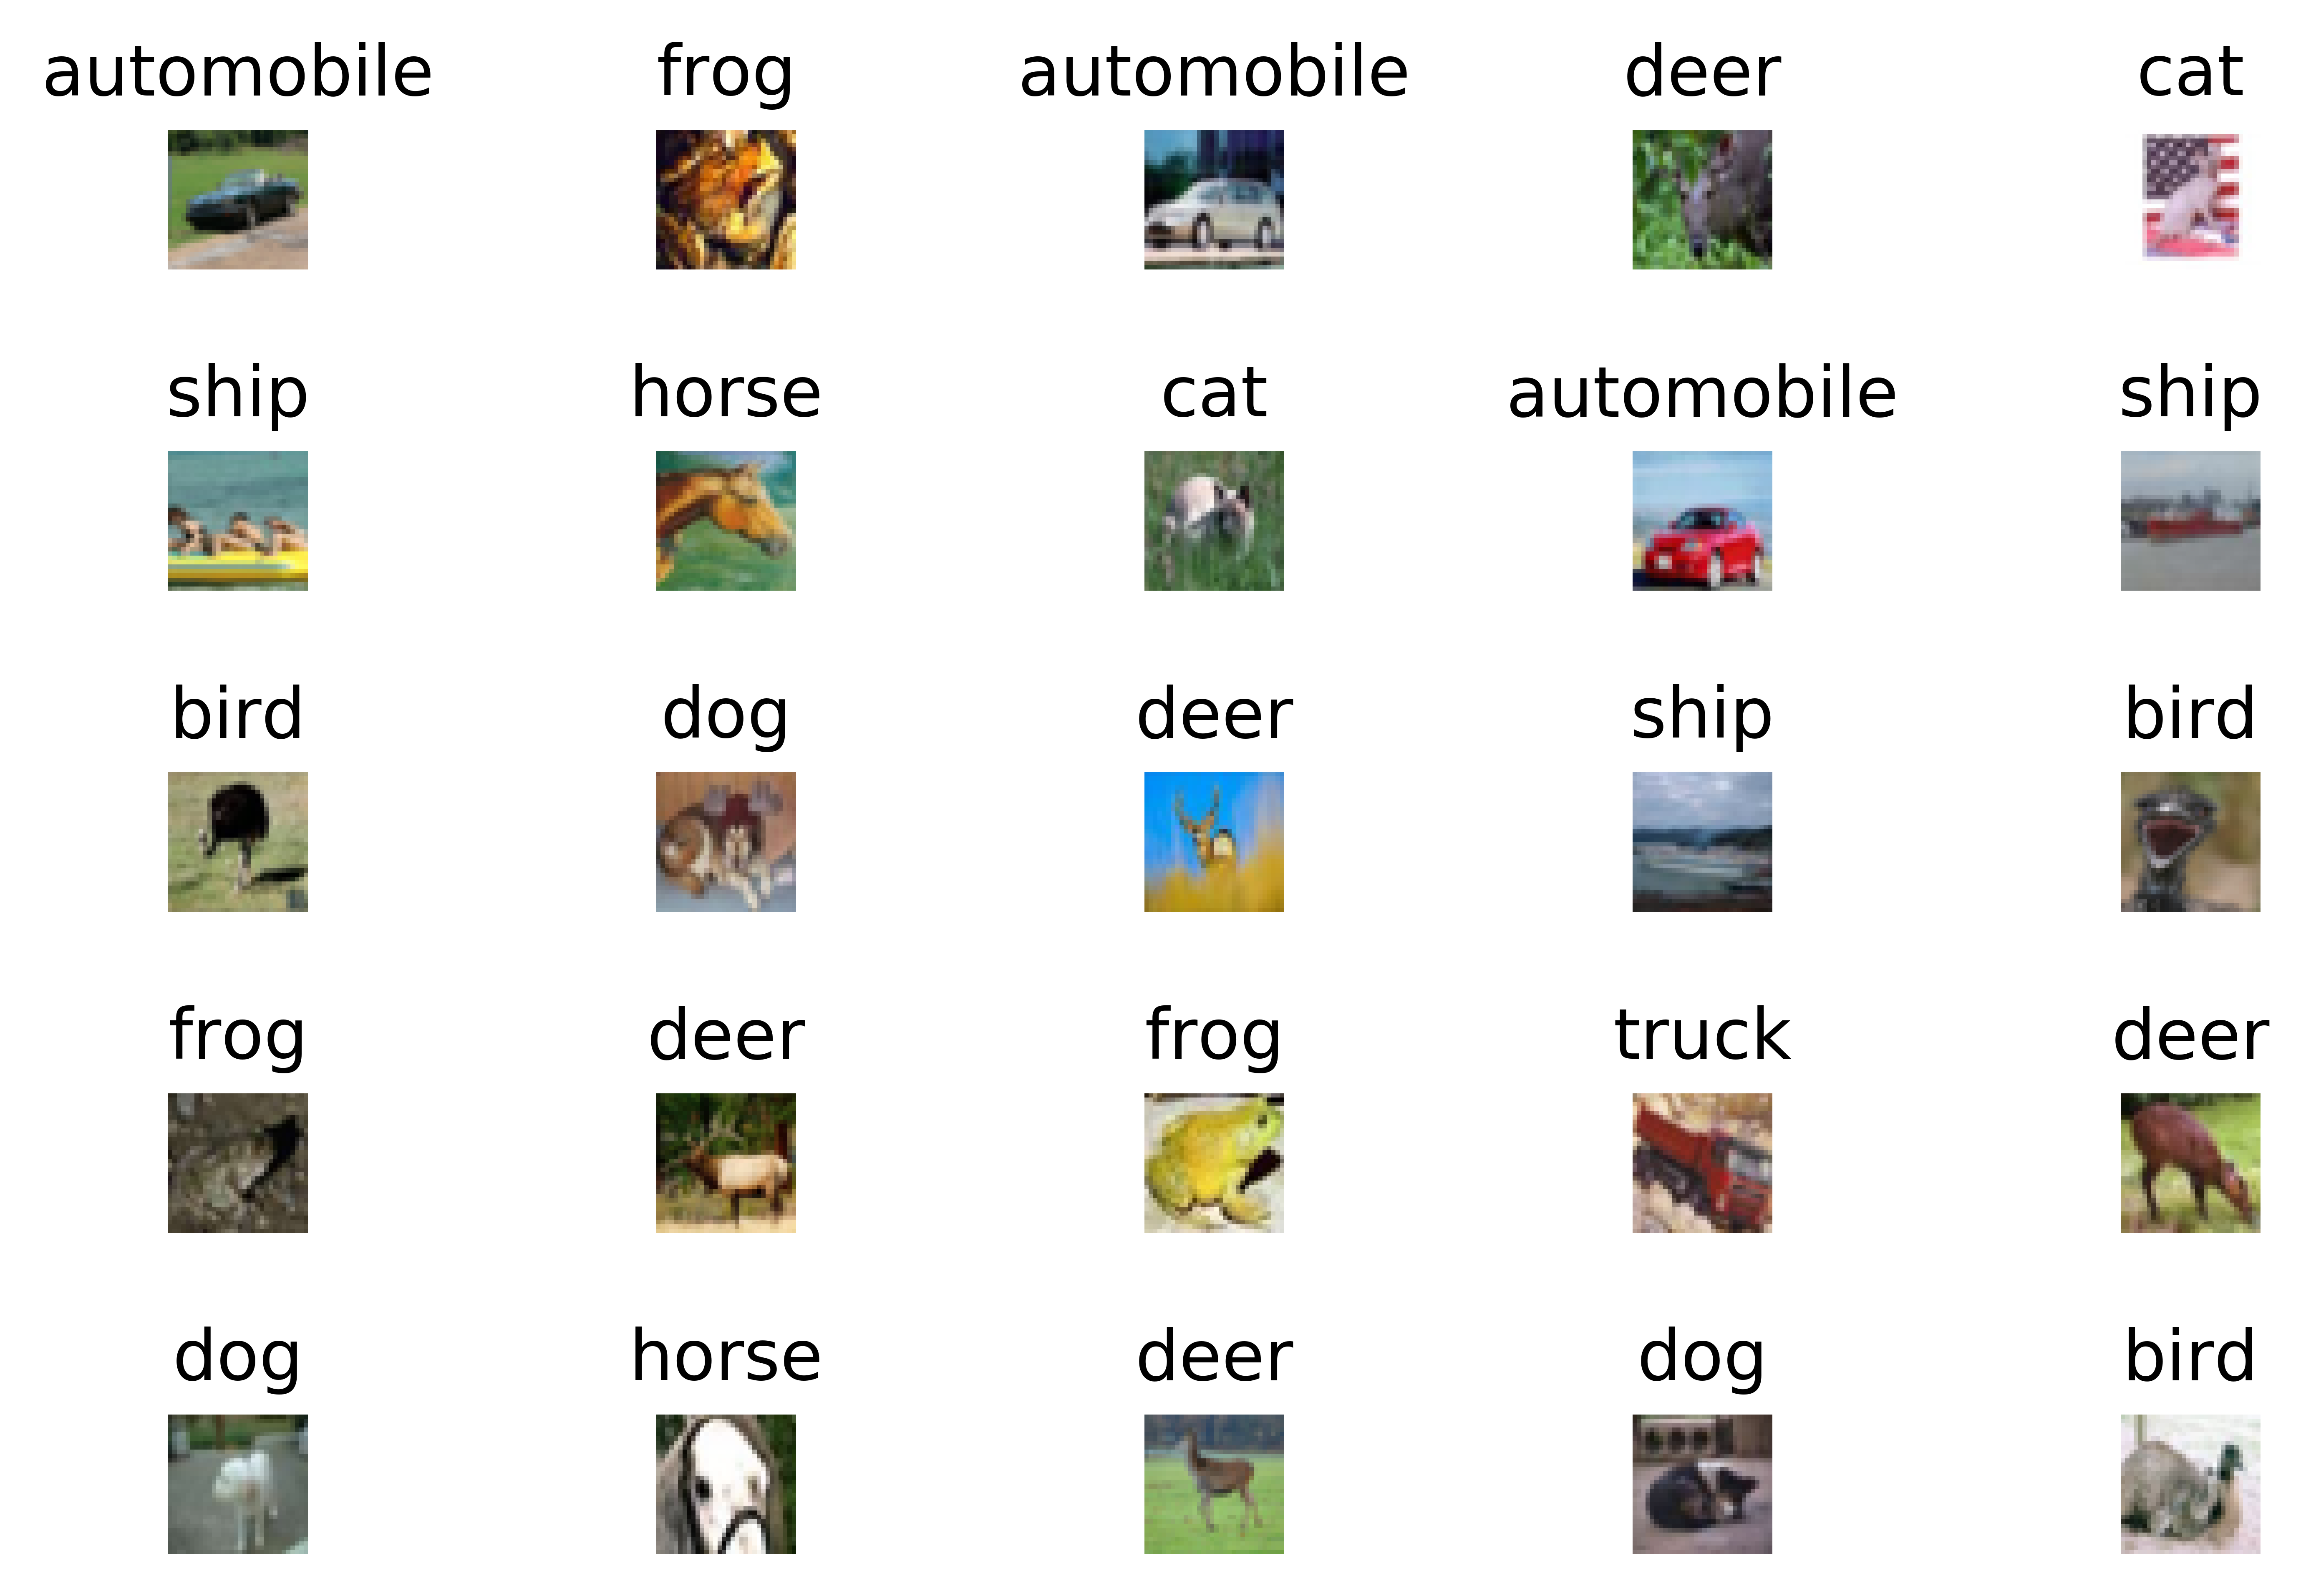

In [14]:
fig,axs = plt.subplots(5,5)
fig.set_dpi(1000)
fig.tight_layout()

i = 0
for index in range(25):
    # The index from the set is different from the index for the for statement.
    set_index = Imgs_index[index]
    Img = X_data[set_index]
    ax = axs[i//5,i%5]
    # y_data contains subarrays (or list), so we must choose the element inside
    ax.set_title(labels_dict[y_data[set_index][0]])
    ax.imshow(Img)
    ax.set_axis_off()
    i+=1

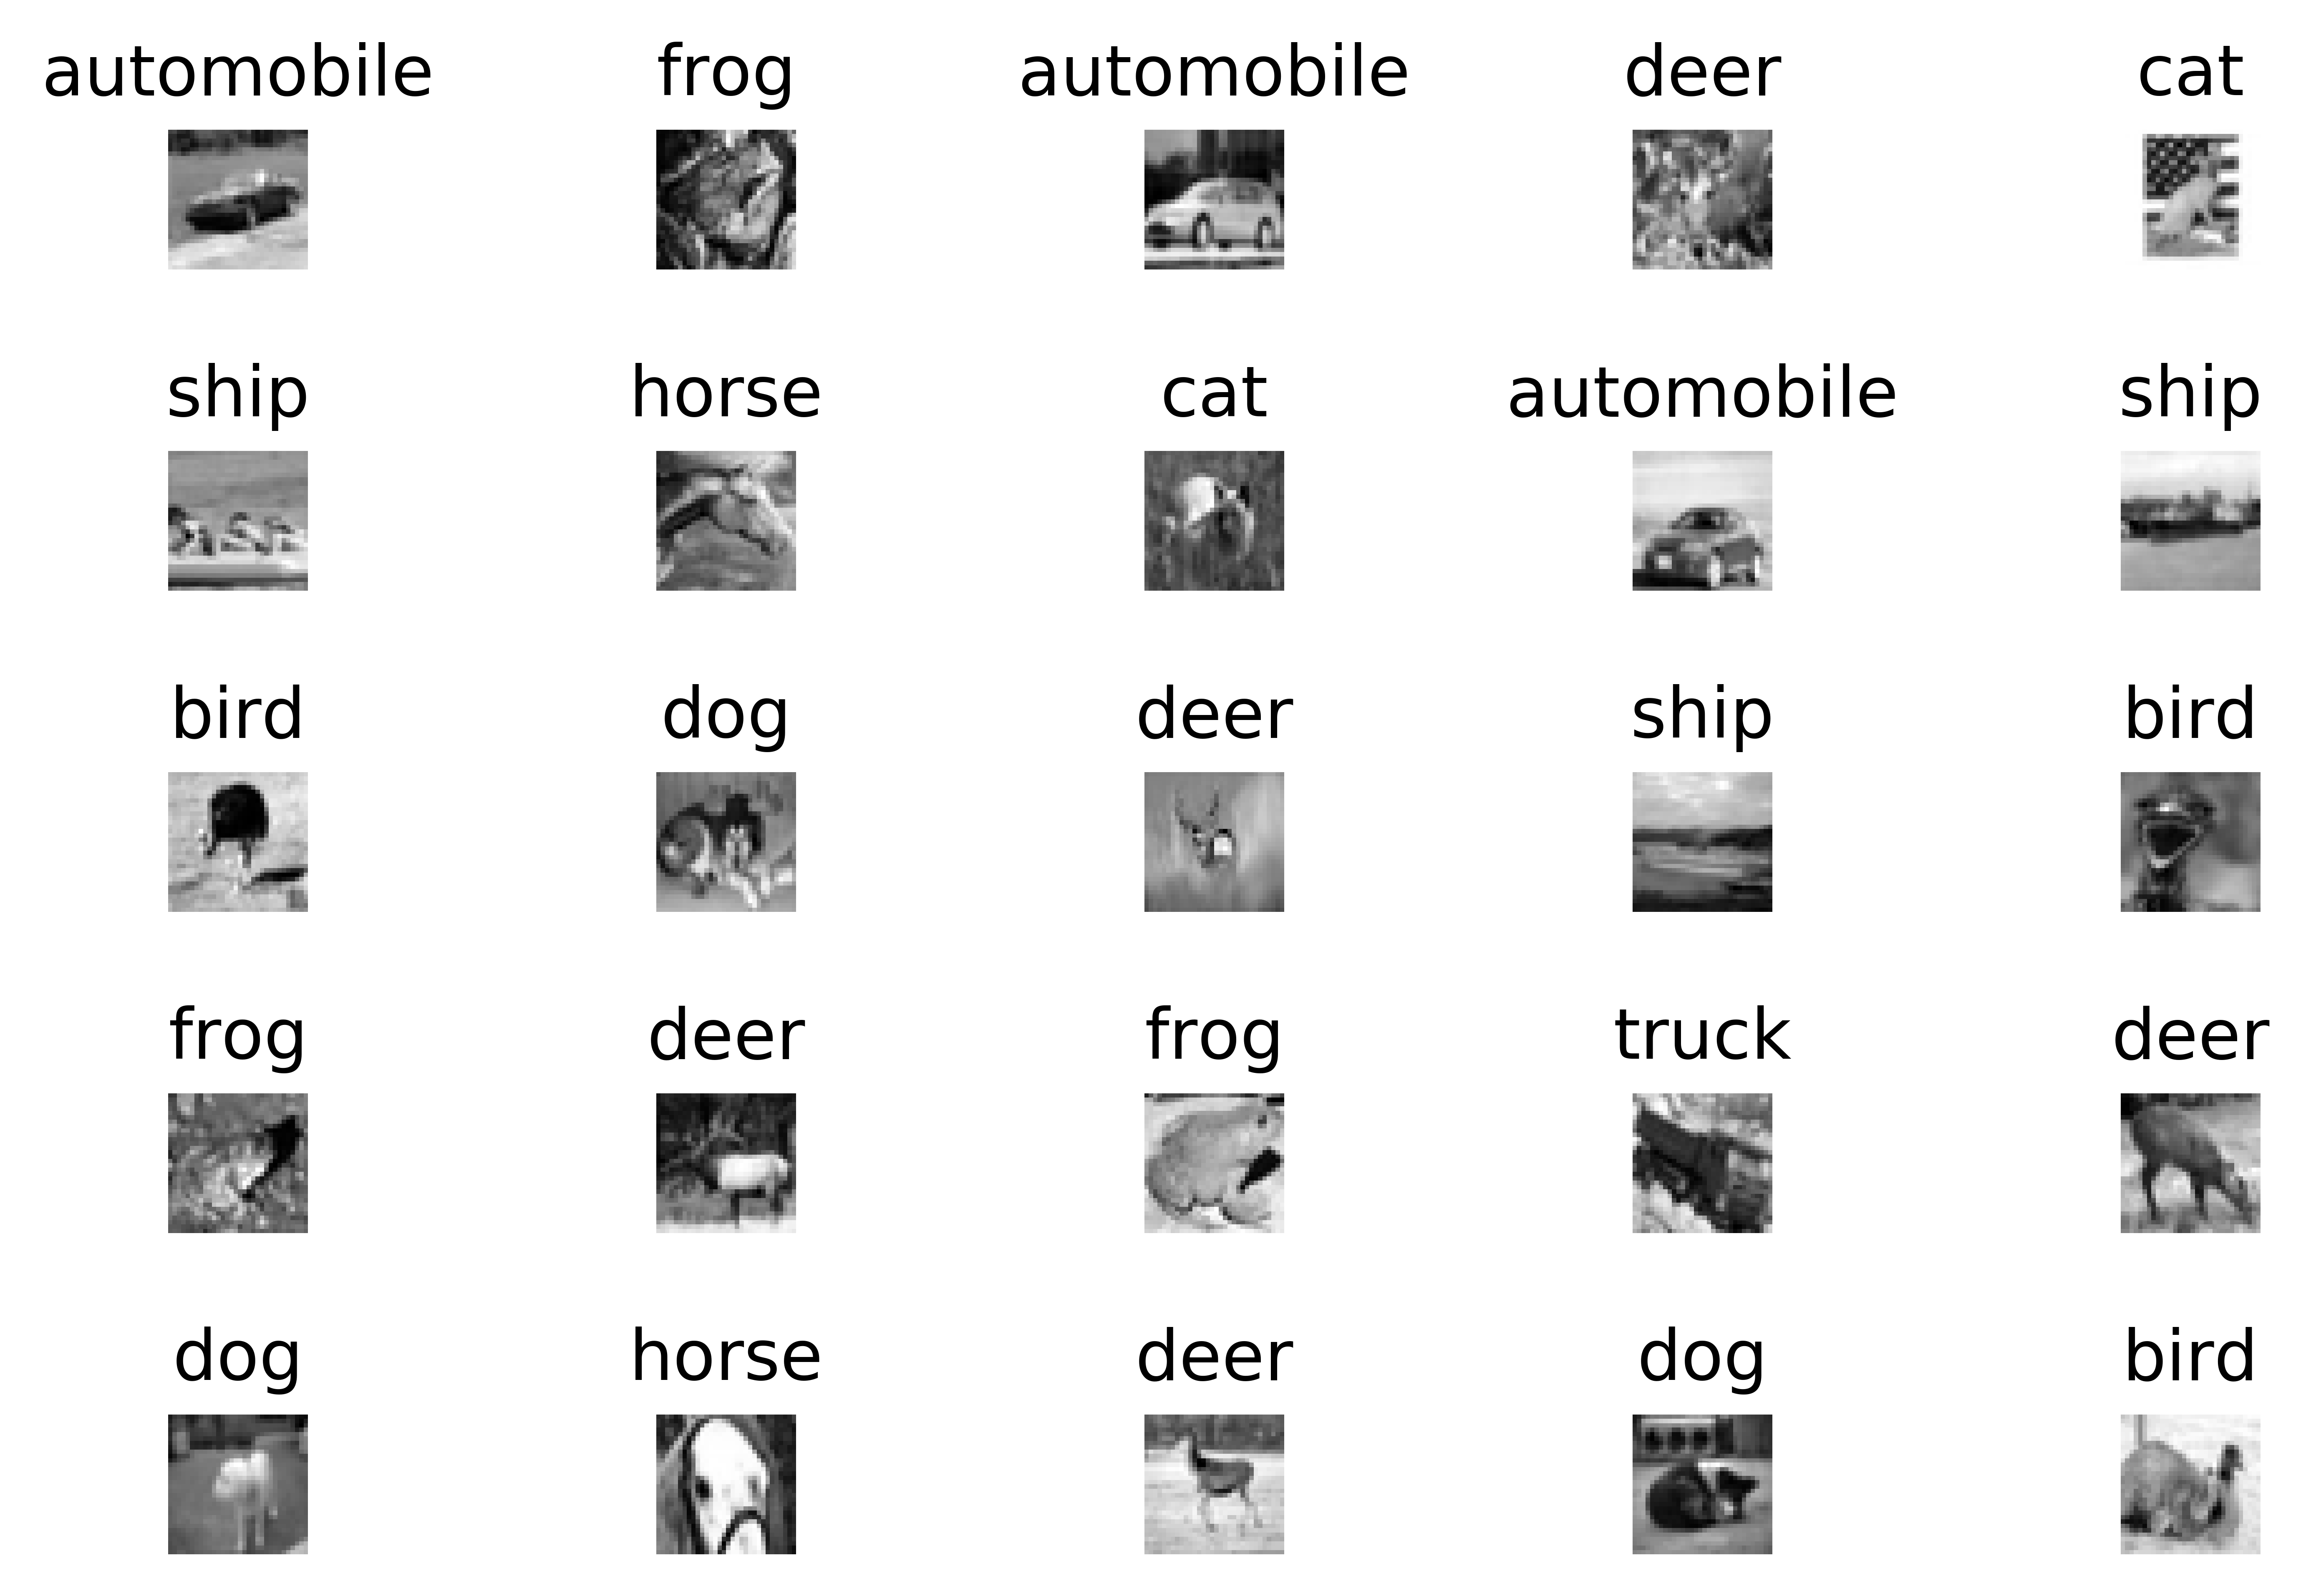

In [15]:
fig,axs = plt.subplots(5,5)
fig.set_dpi(1000)
fig.tight_layout()

i = 0
for index in range(25):
    # The index from the set is different from the index for the for statement.
    set_index = Imgs_index[index]
    Img = X_data[set_index]
    Img = np.average(Img,-1)
    ax = axs[i//5,i%5]
    # y_data contains subarrays (or list), so we must choose the element inside
    ax.set_title(labels_dict[y_data[set_index][0]])
    ax.imshow(Img, cmap='gray')
    ax.set_axis_off()
    i+=1